# Time Series Analysis

In [1]:
import pandas as pd          
import numpy as np          
import matplotlib.pyplot as plt  
from datetime import datetime    
from pandas import Series        
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

## ตัวอย่างของข้อมูลราคาของ HDPE

In [2]:
train=pd.read_csv("historical HPNE price.csv")
train.head(15)

,date,price
0,04-01-16,47.5
1,05-01-16,47.5
2,06-01-16,47.5
3,07-01-16,47.5
4,08-01-16,47.5
5,09-01-16,47.5
6,10-01-16,47.5
7,11-01-16,47.5
8,12-01-16,47.5
9,13-01-16,47.5


In [3]:
train_original=train.copy()
train.shape

(924, 2)

## แปลง format ของข้อมูลให้อยู่ในรูปแบบของวันที่

In [4]:
train['date'] = pd.to_datetime(train.date,format='%d-%m-%y') 
train.head(3)

,date,price
0,2016-01-04,47.5
1,2016-01-05,47.5
2,2016-01-06,47.5


In [5]:
train['year']=train.date.dt.year 
train['month']=train.date.dt.month 
train['day']=train.date.dt.day

In [6]:
train.index = train['date']
train = train.sort_index()
train = train.drop('date',1)
train.head(10)

,price,year,month,day
date,,,,
2016-01-04,47.5,2016,1,4
2016-01-05,47.5,2016,1,5
2016-01-06,47.5,2016,1,6
2016-01-07,47.5,2016,1,7
2016-01-08,47.5,2016,1,8
2016-01-09,47.5,2016,1,9
2016-01-10,47.5,2016,1,10
2016-01-11,47.5,2016,1,11
2016-01-12,47.5,2016,1,12


## พล็อตกราฟ Time Series

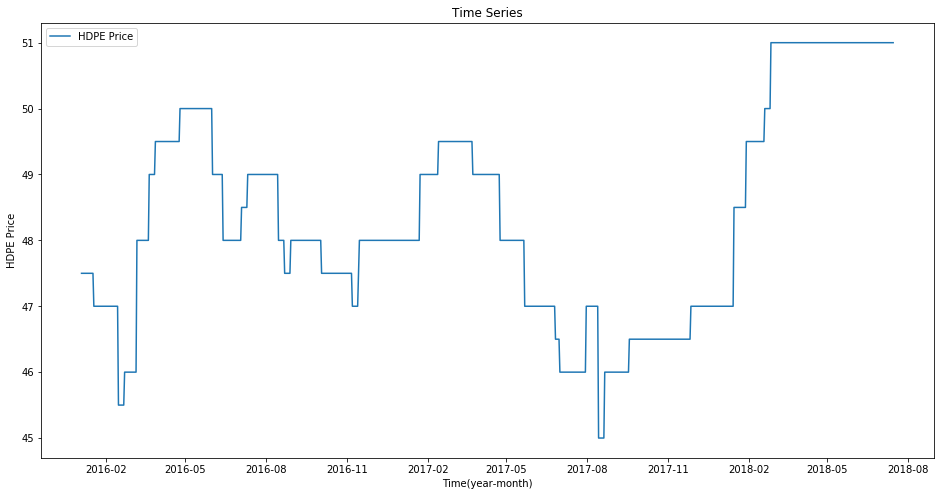

In [7]:
ts = train['price']
plt.figure(figsize=(16,8))
plt.plot(ts, label='HDPE Price')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("HDPE Price")
plt.legend(loc='best')

## พล็อตกราฟค่าเฉลี่ยของราคาในปีต่างๆ

year
2016    48.177686
2017    47.389041
2018    50.339286
Name: price, dtype: float64


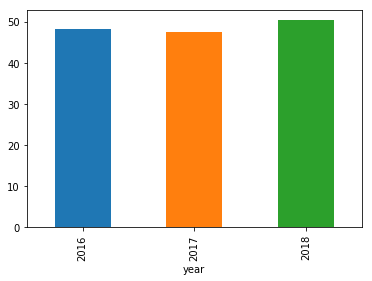

In [8]:
print train.groupby('year')['price'].mean()
train.groupby('year')['price'].mean().plot.bar()

## แบ่งข้อมูลออกเป็นส่วนที่ใช้ train model และ ส่วนที่ใช้ test model

In [9]:
Train=train.ix['2016-01-04':'2017-12-31']
valid=train.ix['2018-01-01':'2018-07-15']

## เส้นกราฟสีส้มคือส่วนข้อมูลที่เป็นส่วน test model

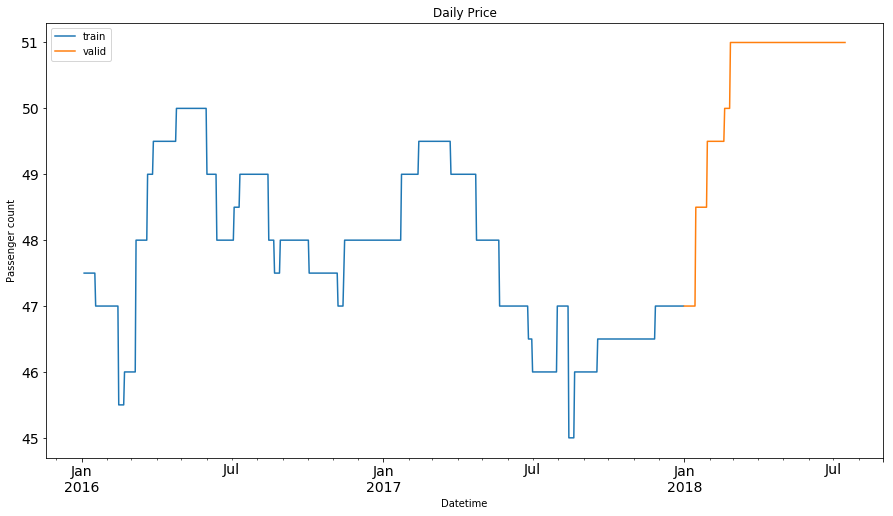

In [10]:
Train.price.plot(figsize=(15,8), title= 'Daily Price', fontsize=14, label='train')
valid.price.plot(figsize=(15,8), title= 'Daily Price', fontsize=14, label='valid')
plt.xlabel("Datetime")
plt.ylabel("Passenger count")
plt.legend(loc='best')
plt.show()

## ทำนายราคาด้วยเทคนิค Moving Average

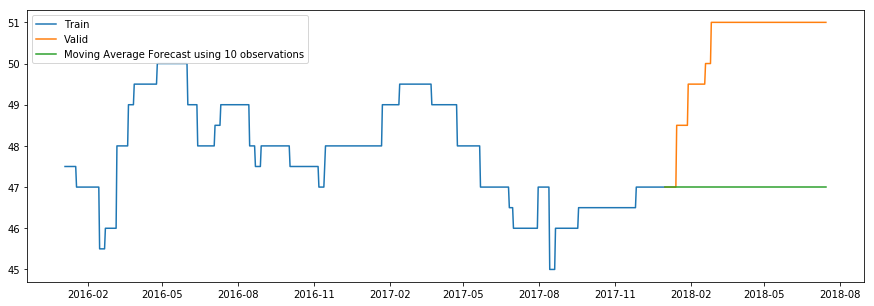

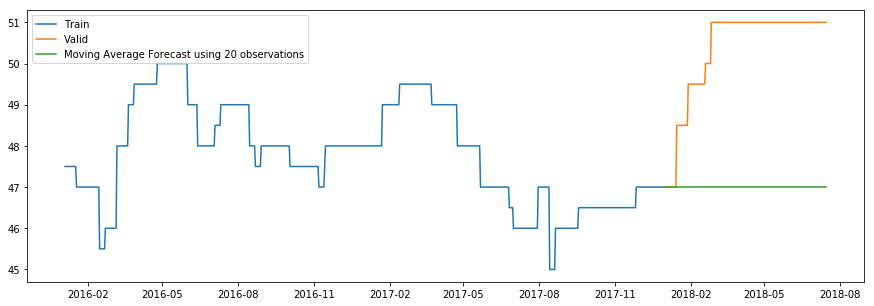

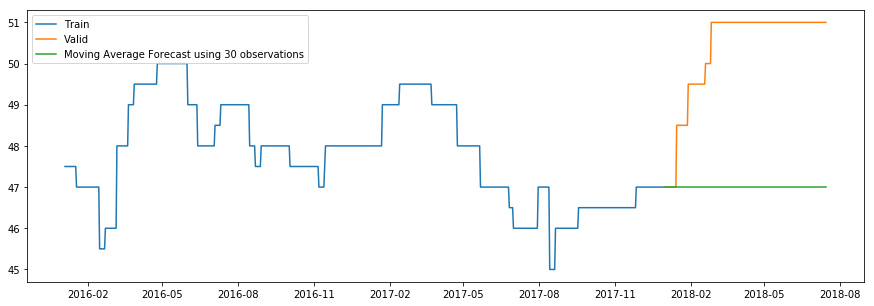

In [11]:
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['price'].rolling(10).mean().iloc[-1]
plt.figure(figsize=(15,5)) 
plt.plot(Train['price'], label='Train')
plt.plot(valid['price'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations')
plt.legend(loc='best')
plt.show()

y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['price'].rolling(20).mean().iloc[-1]
plt.figure(figsize=(15,5)) 
plt.plot(Train['price'], label='Train')
plt.plot(valid['price'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations')
plt.legend(loc='best')
plt.show()

y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['price'].rolling(30).mean().iloc[-1]
plt.figure(figsize=(15,5)) 
plt.plot(Train['price'], label='Train')
plt.plot(valid['price'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 30 observations')
plt.legend(loc='best')
plt.show()

## วัดผลการทดลองด้วยค่า RMS

In [12]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(valid.price, y_hat_avg.moving_avg_forecast))
print(rms)

3.54687991661


## ทำนายราคาด้วยเทคนิค ExponentialSmoothing 

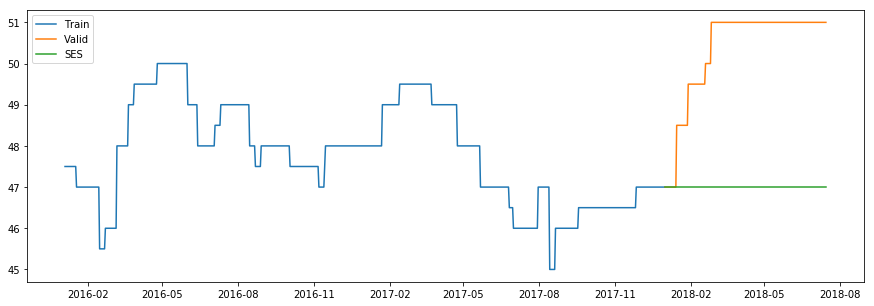

In [13]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['price'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(valid))
plt.figure(figsize=(15,5))
plt.plot(Train['price'], label='Train')
plt.plot(valid['price'], label='Valid')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(valid.price, y_hat_avg.SES))
print(rms)

3.54687991661


## ทำนายราคาด้วยเทคนิค Holt’s Linear

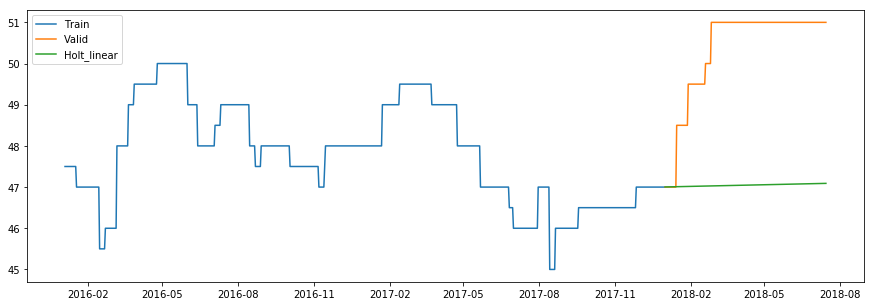

In [15]:
y_hat_avg = valid.copy()

fit1 = Holt(np.asarray(Train['price'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid))

plt.figure(figsize=(15,5))
plt.plot(Train['price'], label='Train')
plt.plot(valid['price'], label='Valid')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [16]:
rms = sqrt(mean_squared_error(valid.price, y_hat_avg.Holt_linear))
print(rms)

3.49667891068


## ทำนายราคาด้วยเทคนิค Holt winter’s model

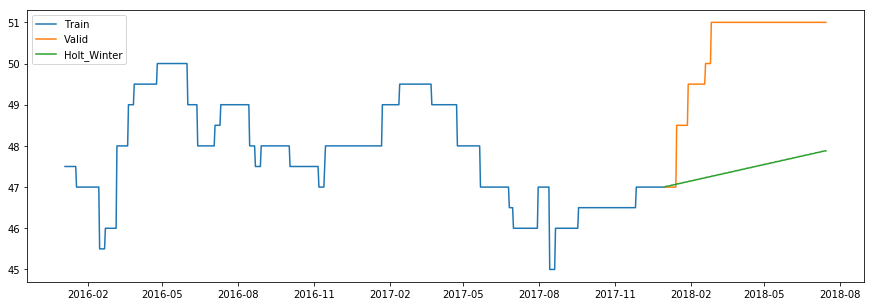

In [17]:
y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train['price']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize=(15,5))
plt.plot( Train['price'], label='Train')
plt.plot(valid['price'], label='Valid')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [18]:
rms = sqrt(mean_squared_error(valid.price, y_hat_avg.Holt_Winter))
print(rms)

3.06672939154
